In [1]:
import random

# Rzut kostką (liczby od 1 do 6)
roll = random.randint(1, 6)
print("Wynik rzutu kostką:", roll)


Wynik rzutu kostką: 2


In [2]:
# Symulacja 10 000 rzutów kostką
n = 10_000
results = [random.randint(1, 6) for _ in range(n)]

# Liczenie częstości każdej liczby
from collections import Counter
counts = Counter(results)

# Obliczanie prawdopodobieństw
probabilities = {outcome: count / n for outcome, count in counts.items()}
print("Prawdopodobieństwa empiryczne:", probabilities)


Prawdopodobieństwa empiryczne: {5: 0.1673, 1: 0.1612, 4: 0.1736, 6: 0.1672, 3: 0.1661, 2: 0.1646}


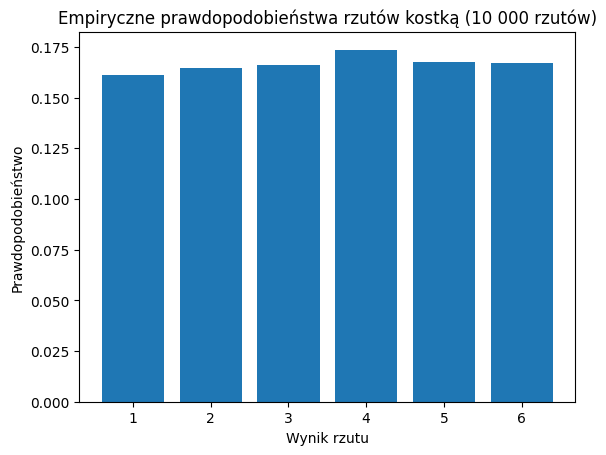

In [3]:
import matplotlib.pyplot as plt

# Wykres słupkowy
plt.bar(probabilities.keys(), probabilities.values())
plt.title("Empiryczne prawdopodobieństwa rzutów kostką (10 000 rzutów)")
plt.xlabel("Wynik rzutu")
plt.ylabel("Prawdopodobieństwo")
plt.show()


In [4]:
# Wszystkie możliwe rzuty, gdzie pierwszy rzut to 3
possible_second = [random.randint(1, 6) for _ in range(10_000)]
count_sum_7 = sum(1 for second in possible_second if 3 + second == 7)

# Prawdopodobieństwo warunkowe
prob = count_sum_7 / len(possible_second)
print("P(Pierwszy rzut = 3 | suma = 7):", prob)


P(Pierwszy rzut = 3 | suma = 7): 0.1672


In [5]:
import numpy as np

# 1 = orzeł, 0 = reszka
coin_flips = np.random.binomial(n=1, p=0.5, size=10000)
prob_heads = np.mean(coin_flips)
print("Szacowane P(orzeł):", prob_heads)


Szacowane P(orzeł): 0.504
